In [7]:
import numpy as np
import scipy as sp
import cv2 as cv

import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
path_indian_pines = '../MCRF_LVC/Data/Indian_Pines/'
path_paviauniversity = '../MCRF_LVC/Data/PaviaUniversity/'

In [5]:
indian_train = cv.imread(path_indian_pines + 'RawData/Train.bmp', 0)

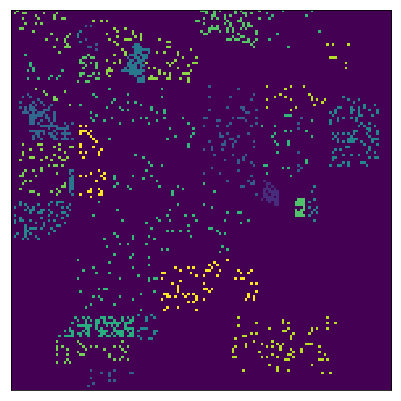

In [11]:
fig = plt.figure(figsize = (15, 7))

ax = fig.add_subplot(1, 1, 1)
ax.imshow(indian_train)
plt.xticks([])
plt.yticks([])

plt.show()

In [57]:
def create_index_matrix(img):
    m, n = img.shape
    index_matrix = np.zeros((m, n))
    ind = 1
    
    for j in range(n):
        for i in range(m):
            if img[i, j] > 0:
                index_matrix[i , j] = ind
                ind += 1
            else:
                index_matrix[i, j] = -1
    
    return index_matrix, ind
    
    

In [58]:
def create_spatial_connectivity(img):
    m, n = img.shape
    index_matrix, ind = create_index_matrix(img)
    
    spatial_connectivity = np.zeros((3, ind - 1))
    
    for i in range(m):
        for j in range(n):
            if i-1 <= 0:
                spatial_connectivity[1, np.int(index_matrix[i,j]-1)] = -1
                spatial_connectivity[2, np.int(index_matrix[i,j]-1)] = -1
            else:
                spatial_connectivity[1, np.int(index_matrix[i,j]-1)] = index_matrix[i-1,j]
            
            if j-1 <= 0:
                spatial_connectivity[0, np.int(index_matrix[i,j]-1)] = -1
                spatial_connectivity[2, np.int(index_matrix[i,j]-1)] = -1
            else:
                spatial_connectivity[0, np.int(index_matrix[i,j]-1)] = index_matrix[i, j-1]
                
            if (i-1 > 0) and (j-1 > 0):
                spatial_connectivity[2, np.int(index_matrix[i,j]-1)] = index_matrix[i-1, j-1]
                
    return spatial_connectivity

In [64]:
def create_bin_file(data, filename):
    with open(filename + '.bin', 'wb') as f:
        f.write(data)

    return '--- Bin File created ---'

In [65]:
create_bin_file(spatial_connectivity, '01_SpatialConnectivity1')

'--- Bin File created ---'